# Email Spam

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:\\tala\\resume\\spam_or_not_spam.csv")
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [4]:
data.isnull().sum()

email    1
label    0
dtype: int64

In [5]:
data=data.dropna(axis=0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


In [7]:
data["label"].nunique()

2

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

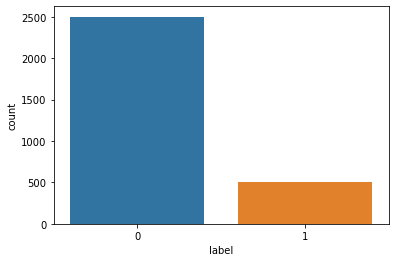

In [8]:
sns.countplot(data["label"])

# Natural Language Processing(NLP)

In [9]:
#lowering the case
data["email"]=data["email"].apply(lambda x:" ".join(x.lower() for x in x.split()))
data.head()

,email,label
0,date wed number aug number number number numbe...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which h...,0


In [10]:
#removing especial characters
data["email"]=data["email"].str.replace("[^\w\s\,]^","")
data.head(1)

C:\Users\Science Pillar\AppData\Local\Temp\ipykernel_9940\2454218230.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["email"]=data["email"].str.replace("[^\w\s\,]^","")


,email,label
0,date wed number aug number number number numbe...,0


# remove stop words

In [11]:
import nltk
from nltk.corpus import stopwords

stop=stopwords.words("english")

data["email"]=data["email"].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
data.head()

,email,label
0,date wed number aug number number number numbe...,0
1,martin posted tassos papadopoulos greek sculpt...,0
2,man threatens explosion moscow thursday august...,0
3,klez virus die already prolific virus ever kle...,0
4,adding cream spaghetti carbonara effect pasta ...,0


# Lemmatization

In [12]:
#lemmatization is a process of extracting a root word by considering the vocabulary
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lem=WordNetLemmatizer()
data["email"]=data["email"].apply(lambda x:" ".join(lem.lemmatize(x) for x in x.split()))
data.head(1)

[nltk_data] Downloading package omw-1.4 to C:\Users\Science
[nltk_data]     Pillar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,email,label
0,date wed number aug number number number numbe...,0


# Tokenization

In [13]:
#Tokenization refers to splitting text into minimal meaningful units.there is a sentence tokenizer and word tokenizer
#this is a mandatory step in text preprocessing for any kind of analysis
from nltk.tokenize import word_tokenize
#from nltk.tokenize import sent_tokenize

nltk.download('punkt')
data["email"]=data.apply(lambda x: word_tokenize(x["email"]) , axis=1)
data.head(1)

[nltk_data] Downloading package punkt to C:\Users\Science
[nltk_data]     Pillar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,email,label
0,"[date, wed, number, aug, number, number, numbe...",0


# Stemming

In [14]:
#stemming is process of extracting a root word
from nltk.stem import PorterStemmer
st=PorterStemmer()
data["email"]=["".join(x)for x in data["email"].values]
data.head(1)

,email,label
0,datewednumberaugnumbernumbernumbernumbernumber...,0


In [16]:
inputs=data["email"]
target=data["label"]

# Feature Enginearing

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
inputs = tv.fit_transform(inputs)

In [18]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train , y_test=train_test_split(inputs , target , test_size=0.2 , random_state=42)

# Training the Model

In [20]:
from sklearn.linear_model import LogisticRegression

reg=LogisticRegression()
reg.fit(x_train , y_train)
reg_pred=reg.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,reg_pred)

0.8333333333333334

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


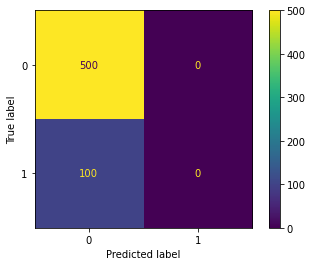

In [24]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(reg , x_test , y_test)

In [23]:
from sklearn.metrics import precision_score

precision_score(y_test , reg_pred)

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [26]:
from sklearn.model_selection import GridSearchCV
grid={"penalty":["l1", "l2", "elasticnet"],"solver":["lbfgs", "liblinear","newton-cholesky"]}

grid=GridSearchCV(reg , grid)
grid.fit(x_train , y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' pen

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cholesky']})

In [27]:
grid.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [28]:
grid_reg_pred=grid.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,grid_reg_pred)

0.8383333333333334

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


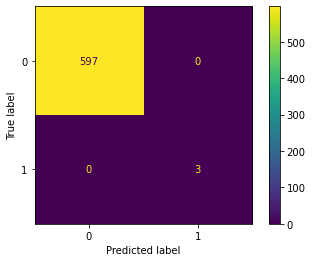

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid , x_test , grid_reg_pred)

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test , reg_pred)